In [43]:
#importing libraries 

import pandas as pd
import matplotlib.pyplot as plt

In [45]:
ts_df = pd.read_csv(r'D:\NCI Sem 1\Statistics and Optimization\ts6.csv')
ts_df

,Unnamed: 0,x
0,1,303.996674
1,2,302.869995
2,3,296.666656
3,4,289.913330
4,5,296.453339
...,...,...
396,397,163.570007
397,398,173.800003
398,399,171.320007
399,400,175.660004


In [47]:
#To have more clarity, renaming the columns to Time and Value
ts_df.columns = ['Time', 'Value']
ts_df

,Time,Value
0,1,303.996674
1,2,302.869995
2,3,296.666656
3,4,289.913330
4,5,296.453339
...,...,...
396,397,163.570007
397,398,173.800003
398,399,171.320007
399,400,175.660004


In [49]:
#Descriptive analysis
ts_df.describe()

,Time,Value
count,401.000000,401.000000
mean,201.000000,215.988071
std,115.902977,44.187797
min,1.000000,108.099998
25%,101.000000,184.309998
50%,201.000000,214.240005
75%,301.000000,251.449997
max,401.000000,309.070007


In [51]:
#Spitting the dataset into train and test data with a ratio of 80:20

split_ratio = 0.8
train_size = int(len(ts_df) * split_ratio)
train, test = ts_df[:train_size], ts_df[train_size:]

#To verify the shapes/ ratio of the dataset
print("\nThe Size of the train data is: ", train.shape)
print("The Size of the test data is: ", test.shape)


The Size of the train data is:  (320, 2)
The Size of the test data is:  (81, 2)


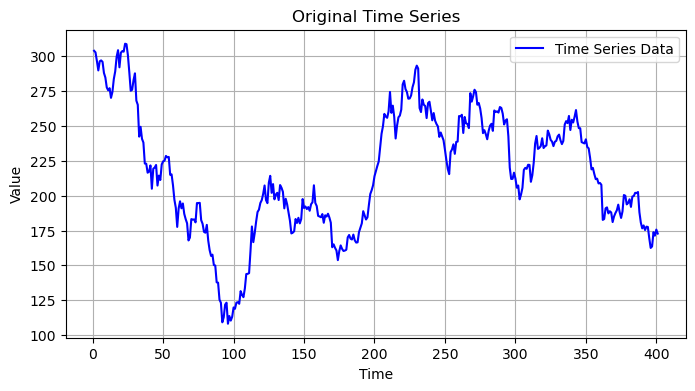

In [53]:
# Plotting the time-series data

plt.figure(figsize=(8, 4))
plt.plot(ts_df['Time'], ts_df['Value'], color='blue', label='Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title("Original Time Series")
plt.legend()
plt.grid()
plt.show()

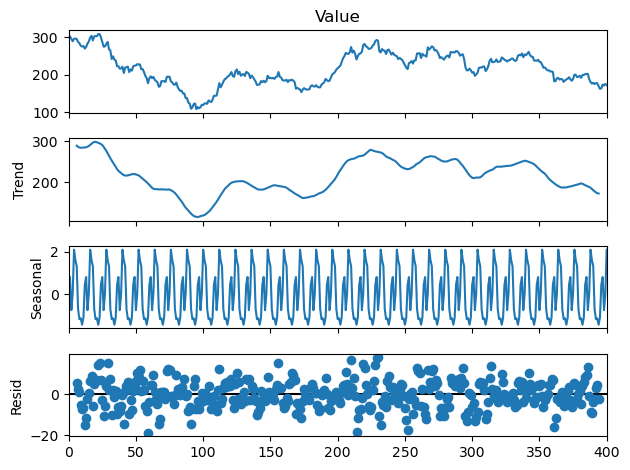

In [55]:
# Combined Visualization of the characteristics of the Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_df['Value'], model='additive', period=12)
decomposition.plot()
plt.show()

In [57]:
# Checking the Staionarity of the data using Augmented Dickey-Fuller (ADF)

from statsmodels.tsa.stattools import adfuller

result = adfuller(train['Value'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values: ", result[4])
if result[0] < result[4]['10%']:
    print("The Time Series is Stationary")
else:
    print("The Time Series is Non-Stationary")
    
#Note: If ADF Statistics > Critical Values then Time series is considered to be Non-Stationary.

ADF Statistic: -2.1363033698063756
p-value: 0.23016952888765296
Critical Values:  {'1%': -3.451281394993741, '5%': -2.8707595072926293, '10%': -2.571682118921643}
The Time Series is Non-Stationary


ADF Statistic: -7.499898560440534
p-value: 4.2809846894822e-11
Critical Values:  {'1%': -3.451281394993741, '5%': -2.8707595072926293, '10%': -2.571682118921643}
The Differenced Time Series is Stationary


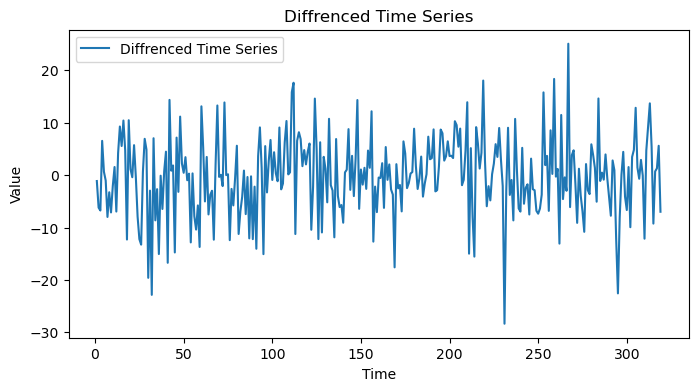

In [59]:
#Since Time Series is Non-Stationary, applying Differencing can make it Stationary by removing any trends/Seasonality
train_diff = train['Value'].diff().dropna()

# Run the ADF test on the differenced data
result = adfuller(train_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values: ", result[4])
if result[0] < result[4]['10%']:
    print("The Differenced Time Series is Stationary")
else:
    print("The Differenced Time Series is Non-Stationary")

#Plotting the Stationary Time Series
plt.figure(figsize=(8, 4))
plt.plot(train_diff, label='Diffrenced Time Series')
plt.title("Diffrenced Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

In [69]:
#Evaluating time series with ARIMA model/ parameter

from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (assuming chosen order (p,d,q) = (1,1,1) for demonstration)
train_data = train['Value']
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

# Summary of model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  320
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1094.755
Date:                Sun, 17 Nov 2024   AIC                           2195.510
Time:                        13:47:27   BIC                           2206.806
Sample:                             0   HQIC                          2200.021
                                - 320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8617      0.168     -5.116      0.000      -1.192      -0.532
ma.L1          0.8117      0.196      4.151      0.000       0.428       1.195
sigma2        56.0197      3.880     14.437      0.0

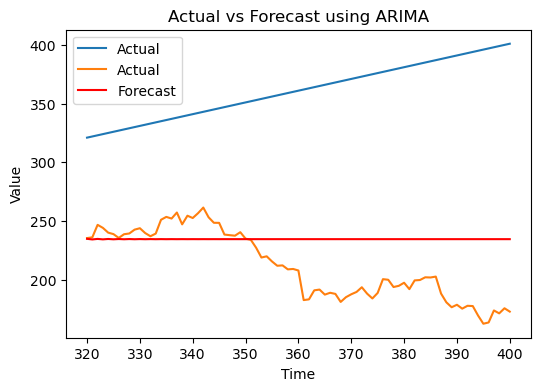

In [77]:
# Visualize forecast vs actual

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(6, 4))
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title("Actual vs Forecast using ARIMA")
plt.show()

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Value   No. Observations:                  320
Model:             ExponentialSmoothing   SSE                          17507.078
Optimized:                         True   AIC                           1312.653
Trend:                         Additive   BIC                           1372.946
Seasonal:                      Additive   AICC                          1314.925
Seasonal Periods:                    12   Date:                 Sun, 17 Nov 2024
Box-Cox:                          False   Time:                         16:48:59
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9999909                alpha                 True
smoothing_trend          

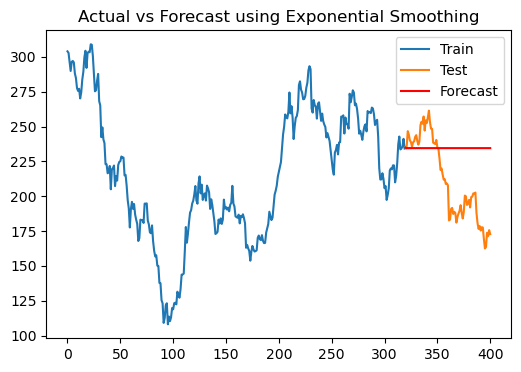

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Value'], 
                             trend='add',         # 'add' or 'mul' for additive or multiplicative trend
                             seasonal='add',      # 'add' or 'mul' for additive or multiplicative seasonality
                             seasonal_periods=12) # set this to the period of seasonality in your data
model_fit = model.fit()

#Print model summary
print(model_fit.summary())

# Visualization of actual vs forecast
plt.figure(figsize=(6, 4))
plt.plot(train['Value'], label='Train')
plt.plot(test['Value'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title("Actual vs Forecast using Exponential Smoothing")
plt.show()

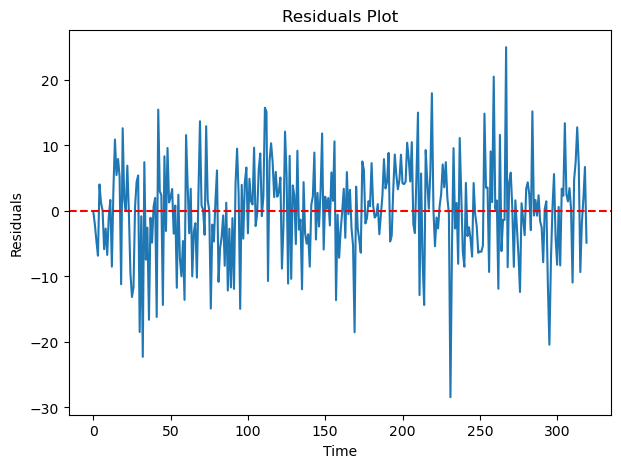

In [85]:
#Graphical representation to show whether white noise is present in the residuals
import matplotlib.pyplot as plt

residuals = model_fit.resid
# Assuming 'residuals' is the residual series from your model
plt.figure(figsize=(7, 5))
plt.plot(residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

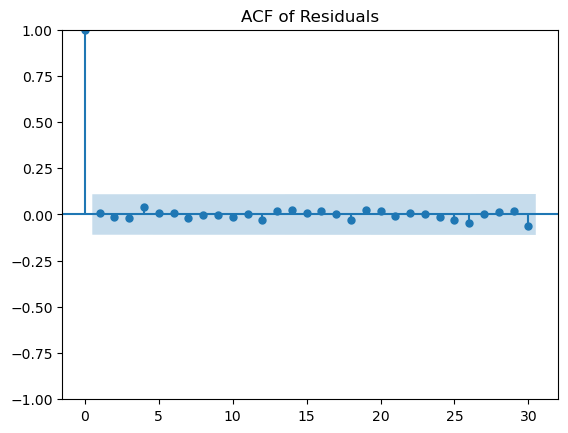

In [73]:
#plotting an ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot of residuals
plot_acf(residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()

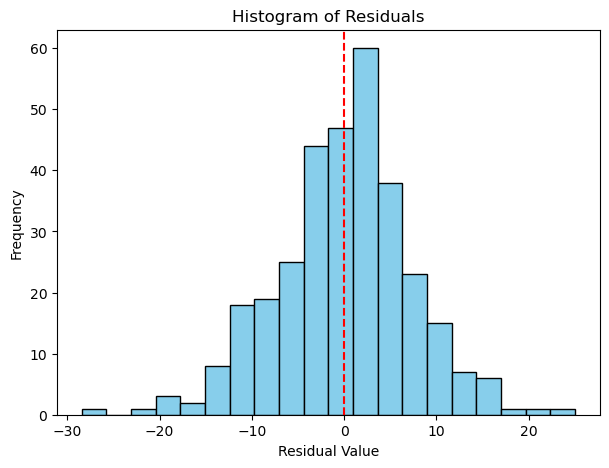

In [87]:
#Histogram to plot white noise

plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

In [29]:
# performing Ljung-Box Test

from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit.resid
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

#Since the p-value is < 0.05 it suggests that the residuals does not resemble white noise and auto-correlation is present

      lb_stat  lb_pvalue
10  19.049671   0.039636


In [33]:
#Since we got p-value < 0.05 while perfroming Ljung-Box test, we iteratively fit the train data until residuals show white noise

# Re-fit an ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Check for white noise in residuals
residuals = model_fit.resid
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

#here we got p-value > 0.05 indicating residuals resemble white noise, and that the model has captured all meaningful patterns in the data

     lb_stat  lb_pvalue
10  0.941679   0.999869


In [35]:
# evaluate the predictive capability of your model using a test data set
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_data = test['Value']
# Forecasting
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 30.067718398464585
Mean Squared Error: 1329.266447857304
